In [1]:

import math
import networkx as nx

In [2]:
G = nx.Graph()

In [3]:
G.add_node(1,contracted=False)
G.add_node(2,contracted=False)
G.add_node(3,contracted=False)
G.add_node(4,contracted=False)
G.add_node(5,contracted=False)
G.add_node(6,contracted=False)
G.add_node(7,contracted=False)
G.add_node(8,contracted=False)
G.add_node(9,contracted=False)
G.add_node(10,contracted=False)
G.add_node(11,contracted=False)
G.add_node(12,contracted=False)
G.add_node(13,contracted=False)
G.add_node(14,contracted=False)

In [4]:
edges = [
    (1,2,{'weight':1}),
    (1,3,{'weight':4}),
    (2,3,{'weight':5}),
    (2,4,{'weight':2}),
    (3,4,{'weight':2}),
    (3,7,{'weight':2}),
    (3,8,{'weight':1}),
    (3,9,{'weight':1}),
    (4,5,{'weight':5}),
    (5,10,{'weight':7}),
    (6,7,{'weight':4}),
    (6,8,{'weight':3}),
    (6,10,{'weight':3}),
    (6,5,{'weight':3}),
    (6,9,{'weight':1}),
    (7,8,{'weight':6}),
    (8,9,{'weight':3}),
    (8,13,{'weight':5}),
    (9,12,{'weight':1}),
    (9,10,{'weight':3}),
    (10,11,{'weight':4}),
    (11,12,{'weight':3}),
    (11,13,{'weight':4}),
    (12,13,{'weight':2}),
    (14,1,{'weight':3}),
    (14,13,{'weight':2})
]

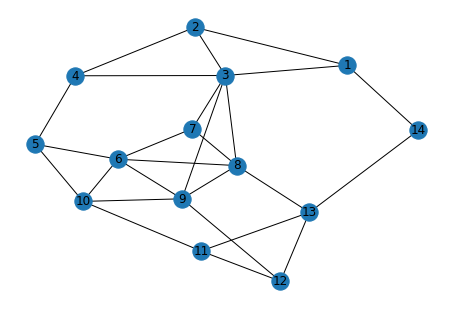

In [6]:
G.add_edges_from([*edges])
nx.draw(G,with_labels=True)

In [8]:
def dijkstra_with_contraction(G, source, destination, contracted = None):
    nx.set_node_attributes(G, {contracted: True}, 'contracted')
    
        
    shortest_path = dict()
    heap = list()
    
    for i in G.nodes():
        if not nx.get_node_attributes(G, 'contracted')[i]:
            shortest_path[i] = math.inf
            heap.append(i)
    shortest_path[source] = 0
    
    while len(heap)>0:
        q = min(heap, key= lambda node : shortest_path[node])
        if q == destination:
            nx.set_node_attributes(G, {contracted: False}, 'contracted')
            return shortest_path[q]
        heap.remove(q)
        # G[q] are incident edges of q
        for v in G[q]:
            # if the node is contracted, skip it
            if not nx.get_node_attributes(G, 'contracted')[v]:
                distance = shortest_path[q] + G[q][v]['weight']
                if distance < shortest_path[v]:
                    shortest_path[v] = distance
    nx.set_node_attributes(G, {contracted: False}, 'contracted')
    
    # can not reach the destination
    return math.inf
    

In [9]:
shortest_paths = dict()
for i in G.nodes():
    # dictionary for every node
    shortest_paths[i] = dict()
    for j in G.nodes():
        shortest_paths[i][j] = dijkstra_with_contraction(G, i, j)

In [10]:
shortest_paths

{1: {1: 0,
  2: 1,
  3: 4,
  4: 3,
  5: 8,
  6: 6,
  7: 6,
  8: 5,
  9: 5,
  10: 8,
  11: 9,
  12: 6,
  13: 5,
  14: 3},
 2: {1: 1,
  2: 0,
  3: 4,
  4: 2,
  5: 7,
  6: 6,
  7: 6,
  8: 5,
  9: 5,
  10: 8,
  11: 9,
  12: 6,
  13: 6,
  14: 4},
 3: {1: 4,
  2: 4,
  3: 0,
  4: 2,
  5: 5,
  6: 2,
  7: 2,
  8: 1,
  9: 1,
  10: 4,
  11: 5,
  12: 2,
  13: 4,
  14: 6},
 4: {1: 3,
  2: 2,
  3: 2,
  4: 0,
  5: 5,
  6: 4,
  7: 4,
  8: 3,
  9: 3,
  10: 6,
  11: 7,
  12: 4,
  13: 6,
  14: 6},
 5: {1: 8,
  2: 7,
  3: 5,
  4: 5,
  5: 0,
  6: 3,
  7: 7,
  8: 6,
  9: 4,
  10: 6,
  11: 8,
  12: 5,
  13: 7,
  14: 9},
 6: {1: 6,
  2: 6,
  3: 2,
  4: 4,
  5: 3,
  6: 0,
  7: 4,
  8: 3,
  9: 1,
  10: 3,
  11: 5,
  12: 2,
  13: 4,
  14: 6},
 7: {1: 6,
  2: 6,
  3: 2,
  4: 4,
  5: 7,
  6: 4,
  7: 0,
  8: 3,
  9: 3,
  10: 6,
  11: 7,
  12: 4,
  13: 6,
  14: 8},
 8: {1: 5,
  2: 5,
  3: 1,
  4: 3,
  5: 6,
  6: 3,
  7: 3,
  8: 0,
  9: 2,
  10: 5,
  11: 6,
  12: 3,
  13: 5,
  14: 7},
 9: {1: 5,
  2: 5,
  3: 1,
  4: 

In [11]:
def calculate_edge_difference(G, shortest_paths):
    edge_difference = list()
    seenBefore = list()
    
    for i in G.nodes():
        # calculate number of incident edges of node-i
        edges_incident = len(G[i])
        # delete the node from original shortest paths dictionary
        # so need to save its state for later iterations
        contracted_node_paths = shortest_paths[i]
        del shortest_paths[i] 
        
        # exclude the node that has just contracted
        new_graph = [*G.nodes()]
        new_graph.remove(i)
        
        # compute the new shortest paths between the node of the graph
        # without the contracted node
        # see the changes and add arcs to the graph accordingly
        new_shortest_paths = dict()
        
        for source in new_graph:
            new_shortest_paths[source] = dict()
            for destination in new_graph:
                # path the contracted node-i to compute new shortest paths accordingly
                new_shortest_paths[source][destination] = dijkstra_with_contraction(G, source, destination, contracted=i)
        
        # the add arcs to keep the graph all pairs shortest paths invariant
        shortcuts = 0
        
        # print(i, new_shortest_paths)
        
        for source in new_shortest_paths:
            # get a copy from the original and the new shortest paths dictionary
            SP_contracted = new_shortest_paths[source]
            SP_original = shortest_paths[source]
            for destination in SP_contracted:
                if [source, destination] in seenBefore: continue
                seenBefore.append(sorted((source, destination)))
                
                # if there is a difference between the original SP and
                # post-contraction SP -> just add new arc
                if SP_contracted[destination] != SP_original[destination]:
                    shortcuts += 1
        
        # leave the dictionary as took it from the last iteration
        shortest_paths[i] = contracted_node_paths
        
        # heuristic for that node
        ED = shortcuts - edges_incident
        edge_difference.append((i, ED))
    return edge_difference  

In [12]:
edge_difference = calculate_edge_difference(G, shortest_paths)

In [13]:
# sort by ED heuristic value
# contract them in the same order as in this list
edge_difference.sort(key= lambda pair:pair[1])
edge_difference

[(8, -5),
 (10, -4),
 (5, -3),
 (7, -3),
 (11, -3),
 (14, 0),
 (2, 2),
 (1, 3),
 (6, 4),
 (13, 5),
 (4, 7),
 (12, 18),
 (3, 26),
 (9, 33)]

In [14]:
# keep track of the edges added after the algorithm finished
edges_before = [*G.edges()]

In [15]:
current_graph = [*G.nodes()]
# iterating over the tuples (node, level) from the sorted ED-list
for node_ED in edge_difference:
    # get first node with lowest ED priority term to contract
    node = node_ED[0]
    # contract the given node through all iterations
    nx.set_node_attributes(G, {node: True}, 'contracted')
    # already contracted the node
    new_graph = current_graph
    new_graph.remove(node)
    current_shortest_paths = dict()
    for source in new_graph:
        current_shortest_paths[source] = dict()
        for destination in new_graph:
            current_shortest_paths[source][destination] = dijkstra_with_contraction(G, source, destination)
    
    for source in current_shortest_paths:
        SP_contracted = current_shortest_paths[source]
        SP_original = shortest_paths[source]
        for destination in SP_contracted:
            if source == destination: continue
            if SP_contracted[destination] != SP_original[destination]:
                print("we have added edge between ", source, destination," after contracting", node)
                G.add_edge(source, destination, weight=SP_original[destination])
    
    current_graph = new_graph
    
        


we have added edge between  1 13  after contracting 14
we have added edge between  2 13  after contracting 14
we have added edge between  13 1  after contracting 14
we have added edge between  13 2  after contracting 14
we have added edge between  1 4  after contracting 2
we have added edge between  4 1  after contracting 2


In [16]:
edges_after = [*G.edges()]

In [17]:
print("# edges before", len(edges_before))
print("# edges after", len(edges_after))

# edges before 26
# edges after 29


In [18]:
added_edges = list(set(edges_after) - set(edges_before))
added_edges

[(1, 13), (2, 13), (1, 4)]

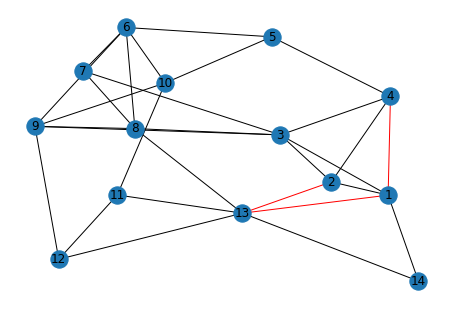

In [19]:
colors = ['r' if edge in added_edges else 'k' for edge in G.edges()] 
nx.draw(G, with_labels=True, edge_color=colors)

In [20]:
hierarchical_order = dict()
for order,node in enumerate(edge_difference):
    hierarchical_order[node[0]] = order

In [21]:
hierarchical_order

{1: 7,
 2: 6,
 3: 12,
 4: 10,
 5: 2,
 6: 8,
 7: 3,
 8: 0,
 9: 13,
 10: 1,
 11: 4,
 12: 11,
 13: 9,
 14: 5}

In [24]:
source = 13
destination = 1


In [25]:
# initializing Dijkstra from source
SP_s = dict()
parent_s = dict()
unrelaxed_s = list()
for node in G.nodes():
    SP_s[node] = math.inf
    parent_s[node] = None
    unrelaxed_s.append(node)
SP_s[source] = 0

# dijkstra
while unrelaxed_s:
    node = min(unrelaxed_s, key= lambda node:SP_s[node])
    unrelaxed_s.remove(node)
    if SP_s[node] == math.inf:
        break
    # G[node] are the incident edges of node
    for child in G[node]:
        # skip unqualified edges
        if hierarchical_order[child] < hierarchical_order[node]:
            continue
        distance = SP_s[node] + G[node][child]['weight']
        # relax edge
        if distance < SP_s[child]:
            SP_s[child] = distance
            parent_s[child] = node

In [26]:
SP_s

{1: inf,
 2: inf,
 3: inf,
 4: inf,
 5: inf,
 6: inf,
 7: inf,
 8: inf,
 9: 3,
 10: inf,
 11: inf,
 12: 2,
 13: 0,
 14: inf}

In [27]:
# initializing Dijkstra from target
SP_t = dict()
parent_t = dict()
unrelaxed_t = list()
for node in G.nodes():
    SP_t[node] = math.inf
    parent_t[node] = None
    unrelaxed_t.append(node)
SP_t[destination] = 0

# dijkstra
while unrelaxed_t:
    node = min(unrelaxed_t, key= lambda node: SP_t[node])
    unrelaxed_t.remove(node)
    if SP_t[node] == math.inf:
        break
    # G[node] are the incident edges of node
    for child in G[node]:
        # skip unqualified edges
        if hierarchical_order[child] < hierarchical_order[node]:
            continue
        distance = SP_t[node] + G[node][child]['weight']
        if distance < SP_t[child]:
            SP_t[child] = distance
            parent_t[child] = node

In [28]:
SP_t

{1: 0,
 2: inf,
 3: 4,
 4: 3,
 5: inf,
 6: inf,
 7: inf,
 8: inf,
 9: 5,
 10: inf,
 11: inf,
 12: 7,
 13: 5,
 14: inf}

In [29]:
minimum = math.inf
merge_node = None
for i in SP_s:
    if SP_t[i] == math.inf:
        continue
    if SP_t[i] + SP_s[i] < minimum:
        minimum = SP_s[i] + SP_t[i]
        merge_node = i

In [30]:
minimum

5

In [31]:
merge_node

13

In [32]:
# see the route from origin of dijkstra to a given node
def route_dijkstra(parent, node):
    route = []
    while node != None:
        route.append(node)
        node = parent[node]
    return route[::-1]

In [33]:
route_from_target = route_dijkstra(parent_t, merge_node)
route_from_target

[1, 13]

In [34]:
route_from_source = route_dijkstra(parent_s, merge_node)
route_from_source

[13]

In [35]:
route = route_from_source + route_from_target[::-1][1:]
route

[13, 1]

In [36]:
from networkx.algorithms.shortest_paths.weighted import single_source_dijkstra
single_source_dijkstra(G, source, destination)

(5, [13, 1])

In [37]:
unvisited = 0
for s_node, s_dist in SP_s.items():
    for t_node, t_dist in SP_t.items():
        if s_node == t_node and s_dist == t_dist == math.inf:
            unvisited += 1
print(f"""we have skipped {unvisited} nodes from a graph with {len(G)}, 
so we have skipped {unvisited/len(G)*100}% of the nodes in our search space.""")

we have skipped 8 nodes from a graph with 14, 
so we have skipped 57.14285714285714% of the nodes in our search space.


EdgeDataView([(1, 2, {'weight': 1}), (1, 3, {'weight': 4}), (1, 14, {'weight': 3}), (1, 13, {'weight': 5}), (1, 4, {'weight': 3}), (2, 3, {'weight': 5}), (2, 4, {'weight': 2}), (2, 13, {'weight': 6}), (3, 4, {'weight': 2}), (3, 7, {'weight': 2}), (3, 8, {'weight': 1}), (3, 9, {'weight': 1}), (4, 5, {'weight': 5}), (5, 10, {'weight': 7}), (5, 6, {'weight': 3}), (6, 7, {'weight': 4}), (6, 8, {'weight': 3}), (6, 10, {'weight': 3}), (6, 9, {'weight': 1}), (7, 8, {'weight': 6}), (8, 9, {'weight': 3}), (8, 13, {'weight': 5}), (9, 12, {'weight': 1}), (9, 10, {'weight': 3}), (10, 11, {'weight': 4}), (11, 12, {'weight': 3}), (11, 13, {'weight': 4}), (12, 13, {'weight': 2}), (13, 14, {'weight': 2})])

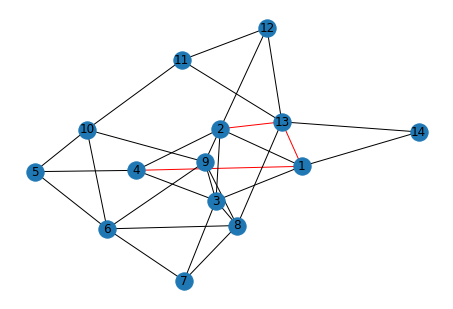

In [48]:
colors = ['r' if edge in added_edges else 'k' for edge in G.edges()] 
nx.draw(G, with_labels=True, edge_color=colors)
G.edges.data()

In [9]:
G.edges.data()

EdgeDataView([(1, 2, {'weight': 1}), (1, 3, {'weight': 4}), (1, 14, {'weight': 3}), (2, 3, {'weight': 5}), (2, 4, {'weight': 2}), (3, 4, {'weight': 2}), (3, 7, {'weight': 2}), (3, 8, {'weight': 1}), (3, 9, {'weight': 1}), (4, 5, {'weight': 5}), (5, 10, {'weight': 7}), (5, 6, {'weight': 3}), (6, 7, {'weight': 4}), (6, 8, {'weight': 3}), (6, 10, {'weight': 3}), (6, 9, {'weight': 1}), (7, 8, {'weight': 6}), (8, 9, {'weight': 3}), (8, 13, {'weight': 5}), (9, 12, {'weight': 1}), (9, 10, {'weight': 3}), (10, 11, {'weight': 4}), (11, 12, {'weight': 3}), (11, 13, {'weight': 4}), (12, 13, {'weight': 2}), (13, 14, {'weight': 2})])